In [55]:
import seaborn as sns
import pandas as pd
import numpy as np
from pydataset import data

## Exercises 1

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
62,6.0,2.2,4.0,1.0,versicolor
65,6.7,3.1,4.4,1.4,versicolor
23,5.1,3.3,1.7,0.5,setosa
33,5.5,4.2,1.4,0.2,setosa
85,6.0,3.4,4.5,1.6,versicolor
97,6.2,2.9,4.3,1.3,versicolor
18,5.7,3.8,1.7,0.3,setosa
13,4.3,3.0,1.1,0.1,setosa
11,4.8,3.4,1.6,0.2,setosa
101,5.8,2.7,5.1,1.9,virginica


In [10]:
data('iris', show_doc = True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

### 1. What does the distribution of petal lengths look like?

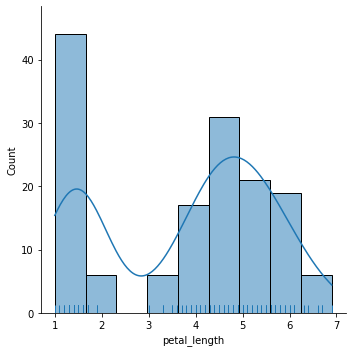

In [19]:
sns.displot(iris.petal_length, kde = True, rug = True)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

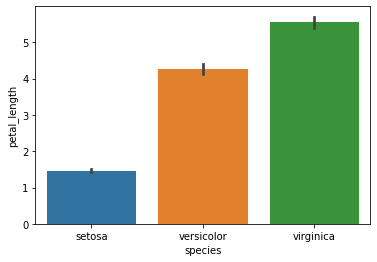

In [18]:
sns.barplot(data = iris, x = 'species', y = 'petal_length')

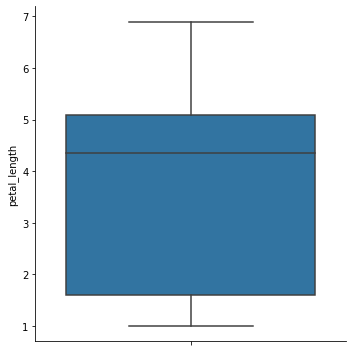

In [20]:
sns.catplot(data = iris, y = 'petal_length', kind = 'box')

### 2. Is there a correlation between petal length and petal width? 

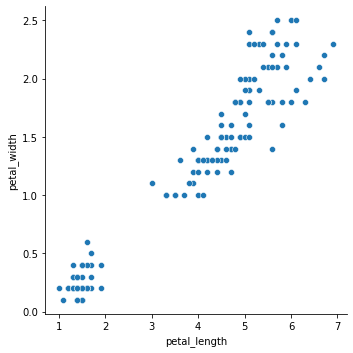

In [16]:
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width')

# Yes, there is a correlation between the petals length and their width. Approx 85 to 90%

### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

In [21]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
127,6.1,3.0,4.9,1.8,virginica
78,6.0,2.9,4.5,1.5,versicolor
105,7.6,3.0,6.6,2.1,virginica
148,6.2,3.4,5.4,2.3,virginica
40,5.0,3.5,1.3,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
104,6.5,3.0,5.8,2.2,virginica
138,6.0,3.0,4.8,1.8,virginica
130,7.4,2.8,6.1,1.9,virginica


In [22]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

('hue', "='smoker'")

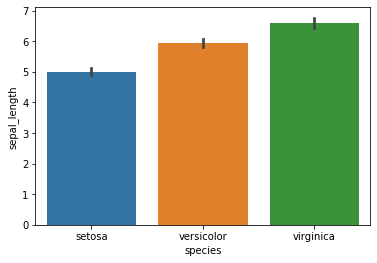

In [28]:
sns.barplot(data = iris, x = 'species', y = 'sepal_length')

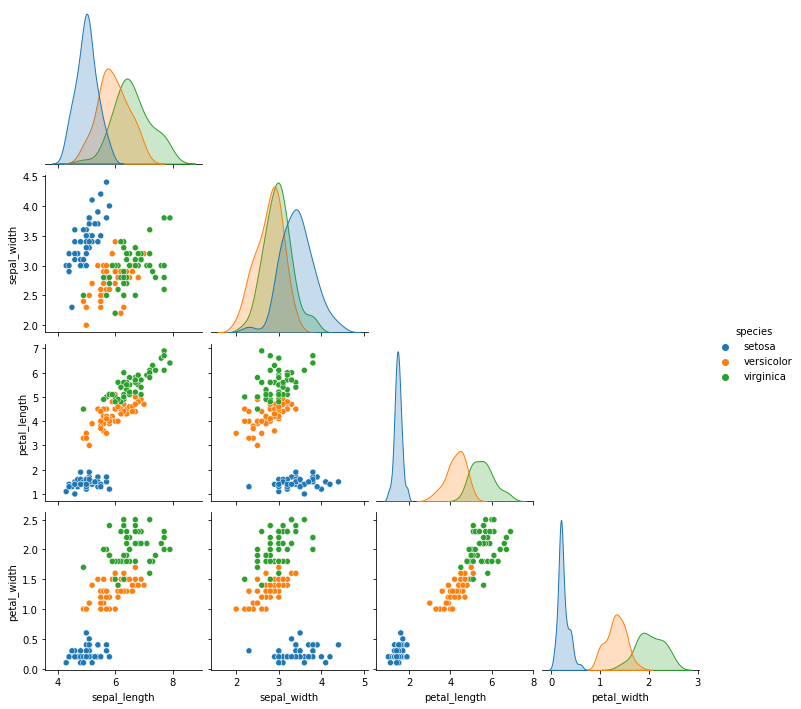

In [30]:
sns.pairplot(iris, hue = 'species', corner = True)

### 4. Which features would be best used to predict species?

- The petal width and their length seems to be the best way to distinguish these species from each other

## Exerscises 2

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [33]:
anscombe = sns.load_dataset('anscombe')

In [34]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [38]:
anscombe.columns

Index(['dataset', 'x', 'y'], dtype='object')

In [39]:
anscombe.shape

(44, 3)

In [40]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [57]:
type(anscombe)

pandas.core.frame.DataFrame

In [82]:
summary = anscombe.groupby('dataset').describe()
summary

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50